## matplotlib

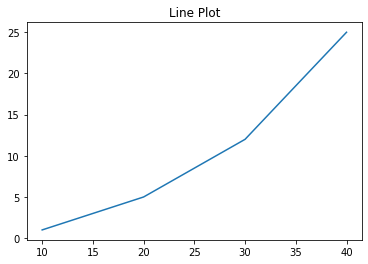

In [4]:
# 1. Line plot (선 그래프)

import matplotlib.pyplot as plt

# plot의 제목을 설정
plt.title('Line Plot')

# plot()이라는 메소드를 이용해서 line plot을 그릴 수 있음
# x 축의 자료 위치(x 축 눈금) => tick은 기본적으로 0, 1, 2, 3
#plt.plot([1, 5, 12, 25])

# 만약 tick을 별도로 명시하고 싶다면
plt.plot([10, 20, 30, 40], [1, 5, 12, 25])

# show()함수를 호출 => 화면에 rendering하고 마우스 이벤트를 기다리는 함수
# 일반 개발 툴(pycharm...)을 이용하면 이 명령어를 이용해야 그래프가 나옴
# jupyter notbook은 셀 단위로 plot을 rendering하기 때문에 굳이 show()를 할 필요가 없음
plt.show()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


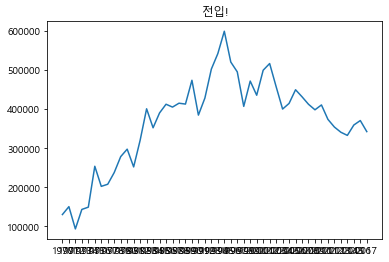

In [24]:
# 간단한 데이터를 이용해서 line plot의 여러가지 기능들을 알아봅시다
# 데이터는 제공된 excel 파일을 이용
# pandas를 이용해서 excel 파일을 DataFrame으로 변환

import numpy as np
import pandas as pd

df = pd.read_excel('../data/matplotlib/lineplot_sample_data.xlsx')
#display(df.head())

# NaN 값 채우기
df = df.fillna(method='ffill')
#display(df.head())
#display(df.tail())

# 관심있는 데이터만 뽑아내기
# 서울에서 다른 지역으로 이동한 데이터만 추출
# => boolean indexing을 이용!
# => boolean mask를 만들어서 indexing
bool_mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df.loc[bool_mask, :]
#display(df_seoul)

df_seoul.drop('전출지별', axis=1, inplace=True)
#display(df_seoul)

# 전입지별 -> 전입지 로 column명을 변경
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
#display(df_seoul)

# 전입지 column을 행 index로 설정
df_seoul.set_index('전입지', inplace=True)
#display(df_seoul)

# 서울특별시에서 경기도로 전입한 데이터만 가져오기
s = df_seoul.loc['경기도']
print(s)

plt.title('전입!')
plt.plot(s.index, s.values)
plt.show()

Malgun Gothic


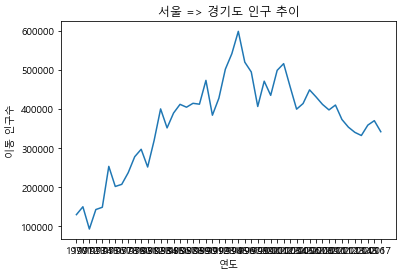

In [29]:
# 한글이 깨지는 현상 해결!

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore') # 경고메세지 출력되지 않게 설정

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있음!!
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 사용
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

# 이전 셀 에서 만들어둔 Series 이용
plt.plot(s.index, s.values)
plt.title('서울 => 경기도 인구 추이')
plt.xlabel('연도')
plt.ylabel('이동 인구수')
plt.show()

Malgun Gothic


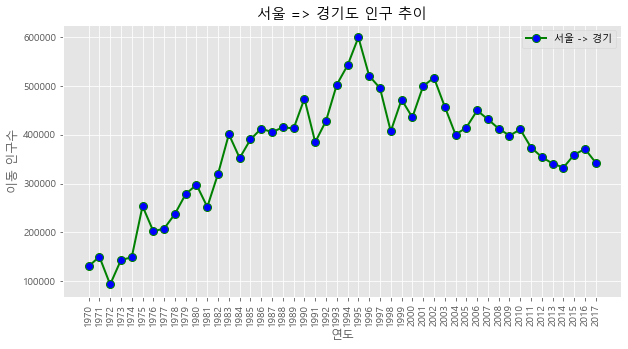

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore') # 경고메세지 출력되지 않게 설정

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있음!!
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 사용
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)
'''
# 이전 셀 에서 만들어둔 Series 이용
plt.plot(s.index, s.values)
plt.title('서울 => 경기도 인구 추이')
plt.xlabel('연도')
plt.ylabel('이동 인구수')
plt.show()
'''
# 예쁘게 style을 꾸며보장
plt.style.use('ggplot')

# 그래프 크기 설정
plt.figure(figsize=(10,5)) # 단위는 인치! 가로, 세로 순으로 크기를 설정

# x축의 눈금을 읽기 어려우니까 label을 회전시킴
plt.plot(s.index, s.values,
         marker='o', # o=circle, s=square, .=point
         markersize=8,
         markerfacecolor='b',
         color='g',
         linewidth=2)
plt.title('서울 => 경기도 인구 추이')
plt.xlabel('연도')
plt.ylabel('이동 인구수')
plt.xticks(rotation='vertical')

#범례
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

Malgun Gothic


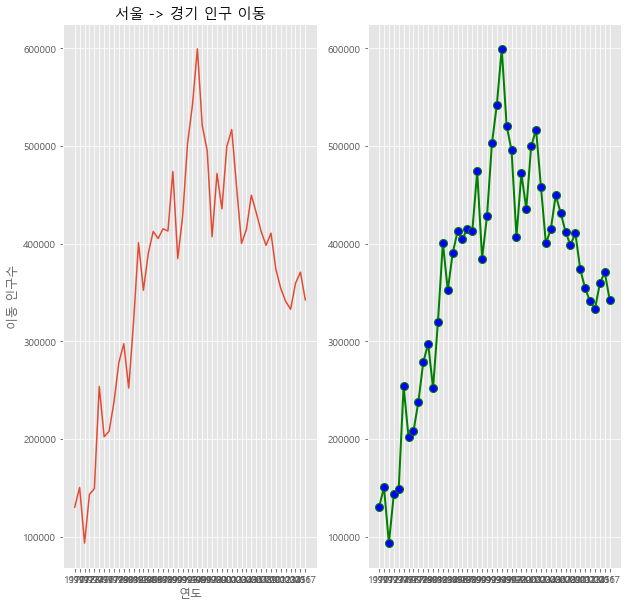

In [49]:
# sub_plot
# => 그래프 여러개를 한번에 그리는 방법

# Figure, Axes, Axis
# Figure : canvas를 나타내는 객체. 도화지 역할임
# => jupyter notebook은 도화지를 자동으로 만들어주는데,
#    도화지 크기를 설정하려면 만들어서 써야함!

# Figure객체는 1개 이상의 Axes로 구성되요

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings(action='ignore') # 경고메세지 출력되지 않게 설정

# 그래프에서 '-' 기호 때문에 문제가 발생할 여지가 있음!!
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 사용
font_path = '../font/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

# 예쁘게 style을 꾸며보장
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째 axes
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째 axes

ax1.set_title('서울 -> 경기 인구 이동')
ax1.set_xlabel('연도')
ax1.set_ylabel('이동 인구수')

ax1.plot(s.index, s.values)

ax2.plot(s.index, s.values,
         marker='o', # o=circle, s=square, .=point
         markersize=8,
         markerfacecolor='b',
         color='g',
         linewidth=2)

plt.show()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


46.6 /// 9.0


<AxesSubplot:ylabel='Frequency'>

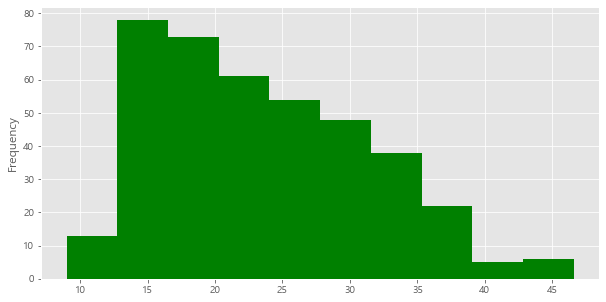

In [57]:
# Histogram
# 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한것

# x축을 같은 크기의 여러 구간(bin)으로 나누고
# y축은 해당 구간안에 포함된 데이터의 개수(빈도, mode)를 표현
# 당연히 x축의 구간(bin)을 조절하면 histogram의 모양은 달라지게 됨


# 데이터 타입 변환
# 사용하는 데이터셋은 MPG data set을 이용
import numpy as np
import pandas as pd

df = pd.read_csv('../data/MPG/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','year','origin','name']
display(df.head())
#print(df.dtypes)

print(df['mpg'].max(), "///" ,df['mpg'].min()) # mpg column의 최대값(46.6), 최소값(9.0)

# pandas의 기능을 이용해서 histogram 그리기
df['mpg'].plot(kind='hist',
               bins=10,   # 최소값과 최대값 사이를 10개의 구간으로 분할
               color='green',
              figsize=(10,5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<AxesSubplot:xlabel='weight', ylabel='mpg'>

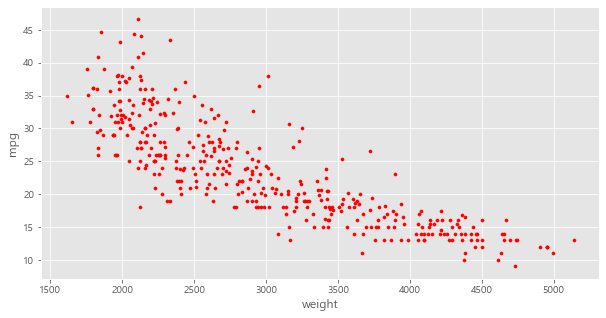

In [58]:
# Histogram은 단변수에 대한 빈도를 그래프로 표현
# Scatter(산점도)는 서로 다른 두 변수 사이의 관계를 표현
# 2개의 변수의 값을 각각 x축과 y에 하나씩 놓고 데이터 값이 위치하는 (x,y)좌표를 찾아서 점으로 표현

import numpy as np
import pandas as pd

df = pd.read_csv('../data/MPG/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','year','origin','name']
display(df.head())

# 두개의 변수를 사용해야함(mpg(연비)와 weight(중량)을 이용)
## Scatter 그리기
df.plot(kind='scatter',
        x='weight',
        y='mpg',
        color = 'red',
        s = 10,
        figsize=(10,5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


{'whiskers': [<matplotlib.lines.Line2D at 0x240f65bb4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x240f65bba60>,
 'boxes': [<matplotlib.lines.Line2D at 0x240f65bb1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x240f65c8040>,
 'fliers': [<matplotlib.lines.Line2D at 0x240f65c8310>,
 'means': []}

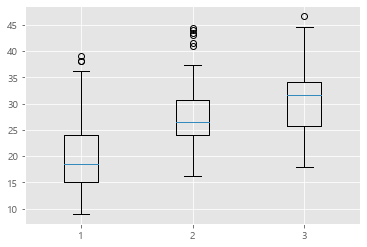

In [62]:
# Box plot
# Histogram은 단변수에 대한 빈도를 그래프로 표현
# Scatter(산점도)는 서로 다른 두 변수 사이의 관계를 표현
# 2개의 변수의 값을 각각 x축과 y에 하나씩 놓고 데이터 값이 위치하는 (x,y)좌표를 찾아서 점으로 표현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/MPG/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','year','origin','name']
display(df.head())

## Box plot 그리기
# 제조국(origin) => 1:USA, 2:EU, 3:JPN
plt.boxplot(x=[df.loc[df['origin']==1,'mpg'],
               df.loc[df['origin']==2,'mpg'],
               df.loc[df['origin']==3,'mpg']])


## 기술통계

In [65]:
# 학생 체력 측정 데이터 불러오기

import numpy as np
import pandas as pd

df = pd.read_csv('../data/student/student_sports_test.csv',
                 index_col='학생번호')

display(df)

# 데이터를 로딩하면 제일 먼저 shape부터 살펴봐야함
print(df.shape)  # (10, 5)

# 10행 5열의 데이터
# 5열(5변수, 5차원) 데이터

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


(10, 5)


In [69]:
# 1차원 데이터에 대한 수치지표 알아보기

import numpy as np
import pandas as pd

# 데이터 로딩
df = pd.read_csv('../data/student/student_scores_em.csv',
                 index_col='student number')

scores = df['english'][:10] # 영어성적 상위 10개로 Series 생성
scores_df = pd.DataFrame(scores)
display(scores_df)

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
Name: english, dtype: int64